# Kalman series: filter and smoother

In [2]:
library(astsa)

In [3]:
# Pge 13 of lectures
y = c(-0.05, -1.9,-1.9,1.77,-0.22,0.3,2.00,2.45,1.92,3.75)
num = 10
mu0 = 0
sigma0 = 1
phi = 1
cQ = 1
cR = 1

In [5]:
ks = Ksmooth0(num, y, 1, mu0, sigma0, phi, cQ, cR)

In [8]:
vec<- cbind(y,ks$xp[1,1,],ks$Pp[1,1,],ks$xf[1,1,],ks$Pf[1,1,],ks$xs[1,1,],ks$Ps[1,1,]) 
colnames(vec) = c("y","mut_t-1","Pt_t-1","mut_t","Pt_t","mut_n","Pt_n")
vec

y,mut_t-1,Pt_t-1,mut_t,Pt_t,mut_n,Pt_n
-0.05,0.00000000,2.000000,-0.03333333,0.6666667,-0.4464435,0.4721360
-1.90,-0.03333333,1.666667,-1.20000000,0.6250000,-1.0661086,0.4508498
-1.90,-1.20000000,1.625000,-1.63333333,0.6190476,-0.8518824,0.4477443
1.77,-1.63333333,1.619048,0.47054545,0.6181818,0.4104613,0.4472926
-0.22,0.47054545,1.618182,0.04375000,0.6180556,0.3132663,0.4472362
0.30,0.04375000,1.618056,0.20212202,0.6180371,0.7493377,0.4472926
2.00,0.20212202,1.618037,1.31327254,0.6180344,1.6347468,0.4477443
2.45,1.31327254,1.618034,2.01580882,0.6180341,2.1549026,0.4508498
1.92,2.01580882,1.618034,1.95659571,0.6180340,2.3799610,0.4721360
3.75,1.95659571,1.618034,3.06498052,0.6180340,3.0649805,0.6180340


---

In [22]:
# generate data 
num = 50
set.seed(1)  
w = rnorm(num+1,0,1)
set.seed(1)  
v = rnorm(num,0,1)

In [23]:
mu = cumsum(w)  # states:  mu[0], mu[1], . . ., mu[50] 
y = mu[-1] + v  # obs:  y[1], . . ., y[50]

In [24]:
# filter and smooth (Ksmooth0 does both)
mu0 = 0; sigma0 = 1;  phi = 1; cQ = 1; cR = 1   
ks = Ksmooth0(num, y, 1, mu0, sigma0, phi, cQ, cR)   

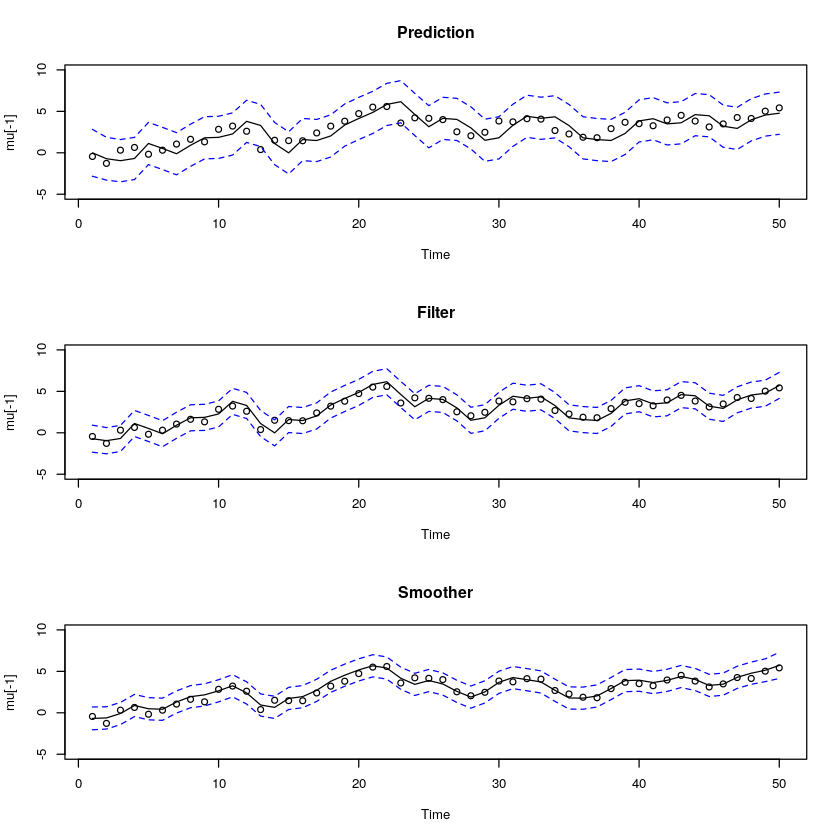

In [25]:
par(mfrow=c(3,1))
Time = 1:num

plot(Time, mu[-1], main="Prediction", ylim=c(-5,10))      
lines(ks$xp)
lines(ks$xp+2*sqrt(ks$Pp), lty="dashed", col="blue")
lines(ks$xp-2*sqrt(ks$Pp), lty="dashed", col="blue")

plot(Time, mu[-1], main="Filter", ylim=c(-5,10))
lines(ks$xf)
lines(ks$xf+2*sqrt(ks$Pf), lty="dashed", col="blue") 
lines(ks$xf-2*sqrt(ks$Pf), lty="dashed", col="blue")

plot(Time, mu[-1],  main="Smoother", ylim=c(-5,10))
lines(ks$xs)
lines(ks$xs+2*sqrt(ks$Ps), lty="dashed", col="blue")
lines(ks$xs-2*sqrt(ks$Ps), lty="dashed", col="blue") 

In [26]:
mu[1]; ks$x0n; sqrt(ks$P0n)   # initial value info

[1] -0,6264538

"-0,3375183"


"0,7861514"


---

In [27]:
#  perso Table exo 2.8 p.40-41 (Moulines); example 6.5 p.301-302 SS
vec<- cbind(y,mu[-1],ks$xp[1,1,],ks$Pp[1,1,],ks$xf[1,1,],ks$Pf[1,1,],ks$xs[1,1,],ks$Ps[1,1,])   #perso
colnames(vec)<- c("y","mu","mut_t-1","Pt_t-1","mut_t","Pt_t","mut_n","Pt_n")
vec[1:10,]

y,mu,mut_t-1,Pt_t-1,mut_t,Pt_t,mut_n,Pt_n
"-1,0692643","-0,4428105","0,0000000","2,000000","-0,7128429","0,6666667","-0,67503654","0,4721360"
"-1,0947958","-1,2784391","-0,7128429","1,666667","-0,9515634","0,6250000","-0,61832706","0,4508497"
"-0,5187869","0,3168417","-0,9515634","1,625000","-0,6836542","0,6190476","-0,08514887","0,4477441"
"2,2416303","0,6463495","-0,6836542","1,619048","1,1247035","0,6181818","0,88166735","0,4472910"
"0,1553889","-0,1741189","1,1247035","1,618182","0,5256132","0,6180556","0,48852066","0,4472249"
"-0,5071582","0,3133101","0,5256132","1,618056","-0,1126779","0,6180371","0,42850575","0,4472152"
"1,5390639","1,0516348","-0,1126779","1,618037","0,9081554","0,6180344","1,30415485","0,4472138"
"2,3657409","1,6274162","0,9081554","1,618034","1,8089929","0,6180341","1,94489489","0,4472136"
"1,8978092","1,3220278","1,8089929","1,618034","1,8638844","0,6180340","2,16478891","0,4472136"
"2,5284206","2,8338090","1,8638844","1,618034","2,2745903","0,6180340","2,65166267","0,4472136"


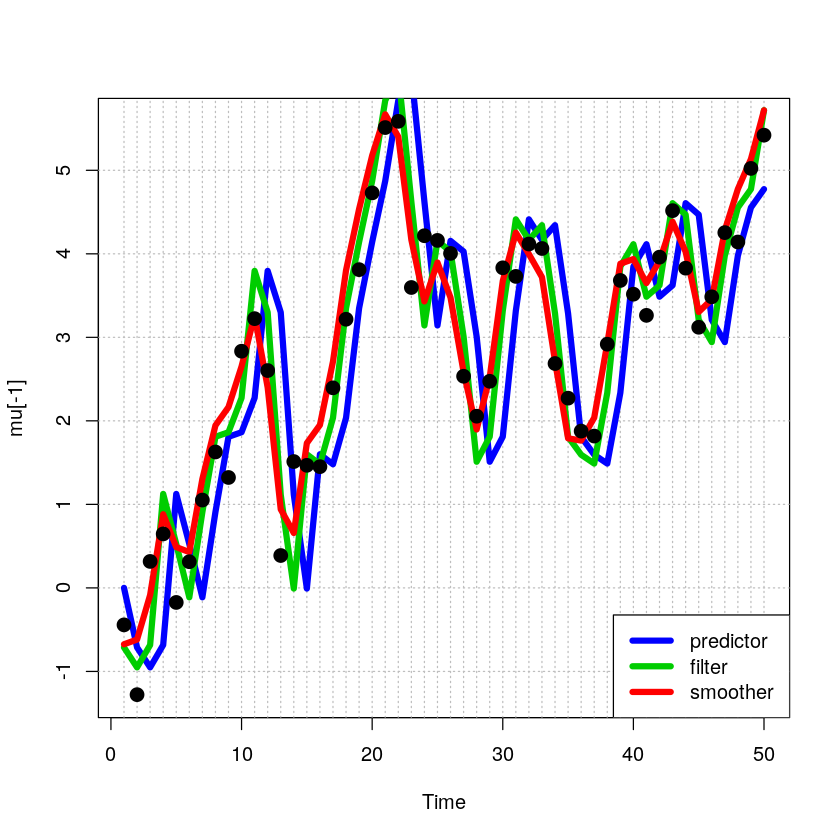

In [31]:
#dev.new()
par(mfrow=c(1,1))
plot(Time, mu[-1], type='n')
abline(v=Time, lty=3, col=8)
abline(h=-1:5, lty=3, col=8)
lines(ks$xp, col=4, lwd=5)
lines(ks$xf, col=3, lwd=5) 
lines(ks$xs, col=2, lwd=5)
points(Time, mu[-1], pch=19, cex=1.5)
names = c("predictor","filter","smoother")
legend("bottomright", names, col=4:2, lwd=5, lty=1, bg="white")



---
##### Newton-Raphson

In [58]:
# Setup 
y = cbind(globtemp, globtempl)
num = nrow(y)
input = rep(1,num)
A = array(rep(1,2), dim=c(2,1,num))
mu0 = -.35; Sigma0 = 1;  Phi = 1

In [59]:
# Function to Calculate Likelihood 
Linn=function(para){
  cQ = para[1]      # sigma_w
  cR1 = para[2]    # 11 element of chol(R)
  cR2 = para[3]    # 22 element of chol(R)
  cR12 = para[4]   # 12 element of chol(R)
  cR = matrix(c(cR1,0,cR12,cR2),2)  # put the matrix together
  drift = para[5]
  kf = Kfilter1(num,y,A,mu0,Sigma0,Phi,drift,0,cQ,cR,input)
  return(kf$like) 
}

In [60]:
str(y)

 Time-Series [1:136, 1:2] from 1880 to 2015: -0,20 -0,11 -0,10 -0,20 -0,28 -0,31 -0,30 -0,33 -0,20 -0,11 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "globtemp" "globtempl"


In [61]:
# Estimation
init.par = c(.1,.1,.1,0,.05)  # initial values of parameters
(est = optim(init.par, Linn, NULL, method="BFGS", hessian=TRUE, control=list(trace=1,REPORT=1))) 
SE = sqrt(diag(solve(est$hessian))) 

# Summary of estimation  
estimate = est$par; u = cbind(estimate, SE)
rownames(u)=c("sigw","cR11", "cR22", "cR12", "drift"); u  

initial  value -411,324427 
iter   2 value -426,036689
iter   3 value -433,552406
iter   4 value -435,309812
iter   5 value -435,812931
iter   6 value -436,293842
iter   7 value -437,471877
iter   8 value -440,321476
iter   9 value -441,702499
iter  10 value -442,207661
iter  11 value -442,566939
iter  12 value -442,773183
iter  13 value -442,786947
iter  14 value -442,816191
iter  15 value -442,847605
iter  16 value -442,893632
iter  17 value -442,943235
iter  18 value -442,971593
iter  19 value -442,972642
iter  20 value -442,972877
iter  20 value -442,972884
iter  20 value -442,972884
final  value -442,972884 
converged


"16049,8803","15522,8553","1531,3139","-3056,1823","-393,5183"
"15522,8553","33596,2449","-3152,0105","-7422,5391","374,2193"
"1531,3139","-3152,0105","12537,5987","4427,7293","-409,0193"
"-3056,1823","-7422,5391","4427,7293","3502,8070","347,2511"
"-393,5183","374,2193","-409,0193","347,2511","44061,8248"


,estimate,SE
sigw,"0,05501124","0,011358852"
cR11,"0,07418174","0,009856923"
cR22,"0,12694400","0,015481675"
cR12,"0,12925308","0,038230357"
drift,"0,00649545","0,004787053"


In [62]:
# Smooth (first set parameters to their final estimates)
cQ    = est$par[1]  
cR1  = est$par[2]   
cR2  = est$par[3]   
cR12 = est$par[4]  
cR    = matrix(c(cR1,0,cR12,cR2), 2)
(R    = t(cR)%*%cR)    #  to view the estimated R matrix
drift = est$par[5]  
ks    = Ksmooth1(num,y,A,mu0,Sigma0,Phi,drift,0,cQ,cR,input)  

"0,005502931","0,009588218"
"0,009588218","0,032821136"


In [63]:
str(ks)

List of 12
 $ xs  : num [1, 1, 1:136] -0,1032 -0,0788 -0,0898 -0,1372 -0,1758 ...
 $ Ps  : num [1, 1, 1:136] 0,00252 0,00190 0,00177 0,00174 0,00174 ...
 $ x0n : num [1, 1] -0,11
 $ P0n : num [1, 1] 0,00552
 $ J0  : num [1, 1] 0,997
 $ J   : num [1, 1, 1:136] 0,604 0,488 0,462 0,456 0,455 ...
 $ xp  : num [1, 1, 1:136] -0,3435 -0,1241 -0,0557 -0,0370 -0,0930 ...
 $ Pp  : num [1, 1, 1:136] 1,00303 0,00764 0,00591 0,00562 0,00557 ...
 $ xf  : num [1, 1, 1:136] -0,1306 -0,0622 -0,0435 -0,0995 -0,1438 ...
 $ Pf  : num [1, 1, 1:136] 0,00461 0,00288 0,00260 0,00254 0,00253 ...
 $ like: num [1, 1] -443
 $ Kn  : num [1, 1:2] 0,661 -0,116


In [68]:
str(yy)

 num [1:272] -0,204 -0,166 -0,174 -0,221 -0,259 ...


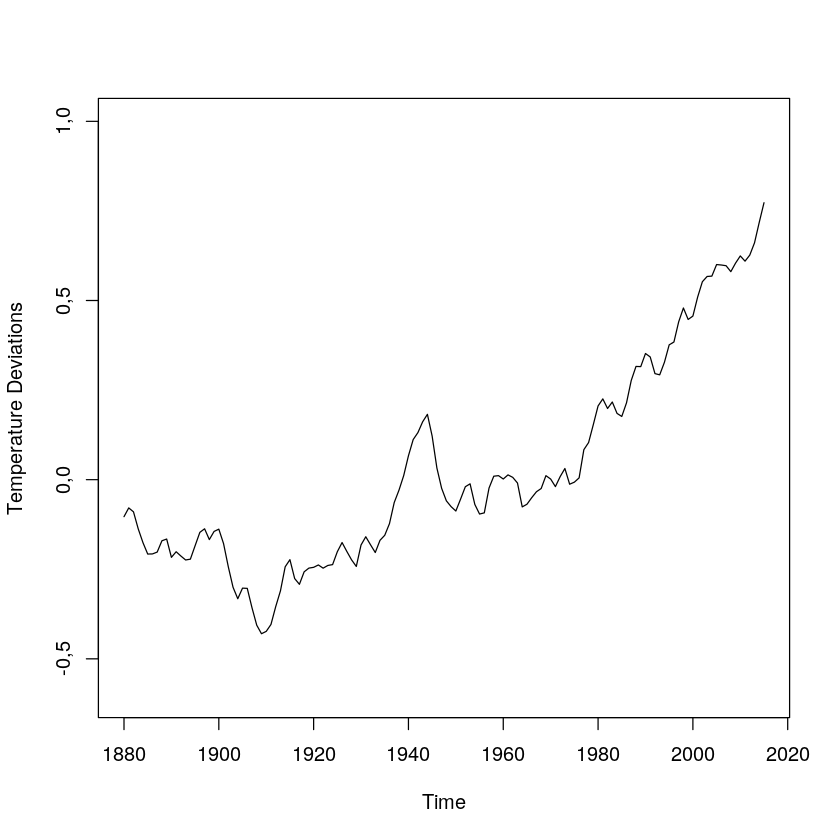

In [67]:
xsm  = ts(as.vector(ks$xs), start=1880)
rmse = ts(sqrt(as.vector(ks$Ps)), start=1880)
plot(xsm, ylim=c(-.6, 1), ylab='Temperature Deviations')
xx = c(time(xsm), rev(time(xsm)))
yy = c(xsm-2*rmse, rev(xsm+2*rmse))
#polygon(xx, yy, border=NA, col=gray(.6, alpha=.25))
#lines(globtemp, type='o', pch=2, col=4, lty=6)
#lines(globtempl, type='o', pch=3, col=3, lty=6)

---
#### Missing data example

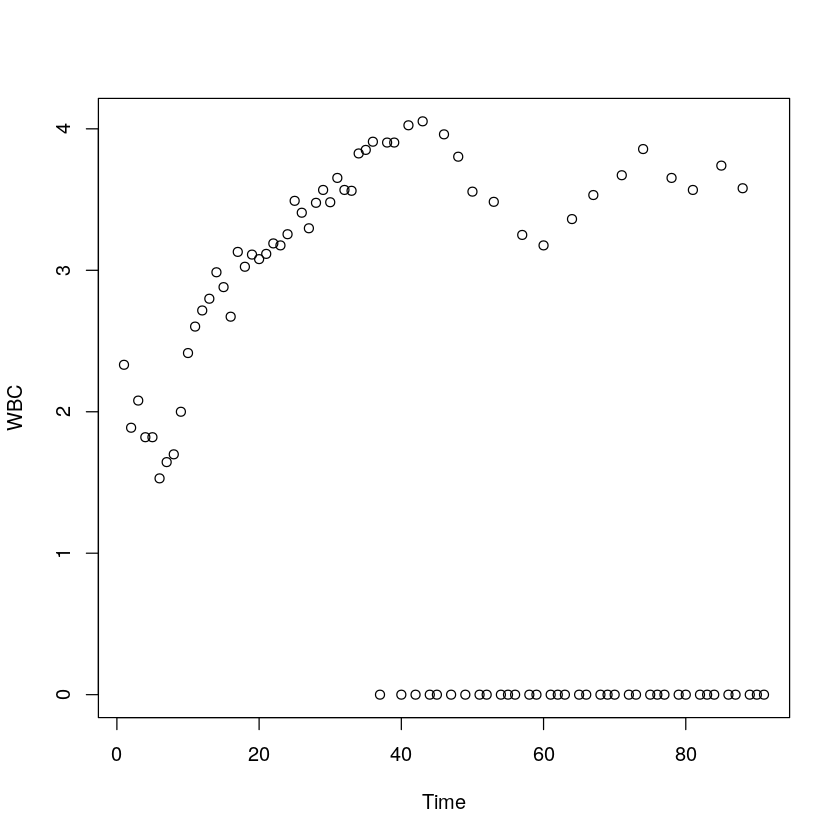

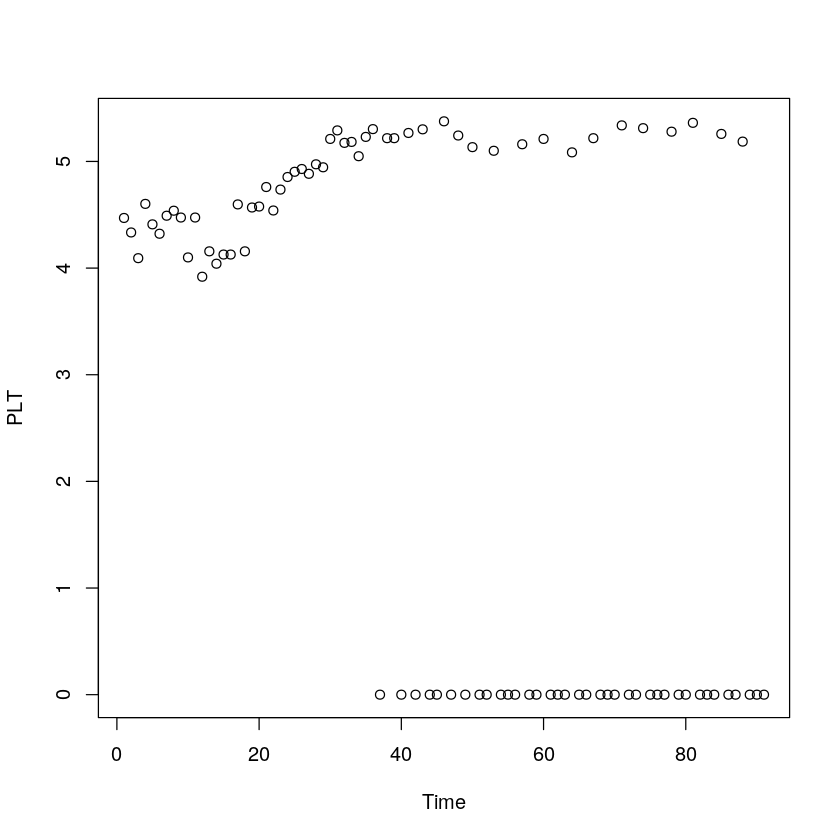

In [51]:
y    = cbind(WBC, PLT, HCT)
num  = nrow(y)       
A    = array(0, dim=c(3,3,num))  # creates num 3x3 zero matrices
for(k in 1:num) if (y[k,1] > 0) A[,,k]= diag(1,3)
plot(WBC,type="p")
plot(PLT, type = 'p')

In [49]:
# Initial values 
mu0    = matrix(0,3,1) 
Sigma0 = diag(c(.1,.1,1) ,3)
Phi    = diag(1,3)
cQ     = diag(c(.1,.1,1), 3)
cR     = diag(c(.1,.1,1), 3)  
(em = EM1(num, y, A, mu0, Sigma0, Phi, cQ, cR, 100, .001))    

iteration    -loglikelihood 
    1          68,28328 
    2          -183,9361 
    3          -194,2051 
    4          -197,5444 
    5          -199,7442 
    6          -201,6431 
    7          -203,4226 
    8          -205,1253 
    9          -206,7595 
    10          -208,3251 
    11          -209,8209 
    12          -211,2464 
    13          -212,602 
    14          -213,8891 
    15          -215,1094 
    16          -216,2651 
    17          -217,3589 
    18          -218,3931 
    19          -219,3705 
    20          -220,2935 
    21          -221,1649 
    22          -221,9869 
    23          -222,762 
    24          -223,4924 
    25          -224,1805 
    26          -224,8282 
    27          -225,4377 
    28          -226,0109 
    29          -226,5495 
    30          -227,0555 
    31          -227,5305 
    32          -227,9762 
    33          -228,3941 
    34          -228,7857 
    35          -229,1524 
    36          -229,4956 
    37     

$Phi
            [,1]        [,2]        [,3]
[1,]  0,98052698 -0,03494377 0,008287009
[2,]  0,05279121  0,93299479 0,005464917
[3,] -1,46571679  2,25780951 0,795200344

$Q
             [,1]         [,2]       [,3]
[1,]  0,013786772 -0,001724166 0,01882951
[2,] -0,001724166  0,003032109 0,03528162
[3,]  0,018829510  0,035281625 3,61897901

$R
            [,1]      [,2]      [,3]
[1,] 0,007124671 0,0000000 0,0000000
[2,] 0,000000000 0,0168669 0,0000000
[3,] 0,000000000 0,0000000 0,9724247

$mu0
          [,1]
[1,]  2,119269
[2,]  4,407390
[3,] 23,905038

$Sigma0
              [,1]          [,2]          [,3]
[1,]  4,553949e-04 -5,249215e-05  0,0005877626
[2,] -5,249215e-05  3,136928e-04 -0,0001199788
[3,]  5,877626e-04 -1,199788e-04  0,1677365489

$like
 [1]   68,28328 -183,93608 -194,20508 -197,54440 -199,74425 -201,64313
 [7] -203,42258 -205,12530 -206,75951 -208,32511 -209,82091 -211,24639
[13] -212,60202 -213,88906 -215,10935 -216,26514 -217,35887 -218,39311
[19] -219,37048 -220,29354 -221,16485 -221,98686 -222,76196 -223,49243
[25] -224,18049 -224,82824 -225,43771 -226,01085 -226,54953 -227,05552
[31] -227,53054 -227,97621 -228,39410 -228,78569 -229,15242 -229,49563
[37] -229,81661 -230,11659 -230,39674 -230,65816 -230,90189 -231,12893

$niter
[1] 42

$cvg
[1] 0,0009832656

In [77]:
?Kfilter1

In [76]:
?'%*%'

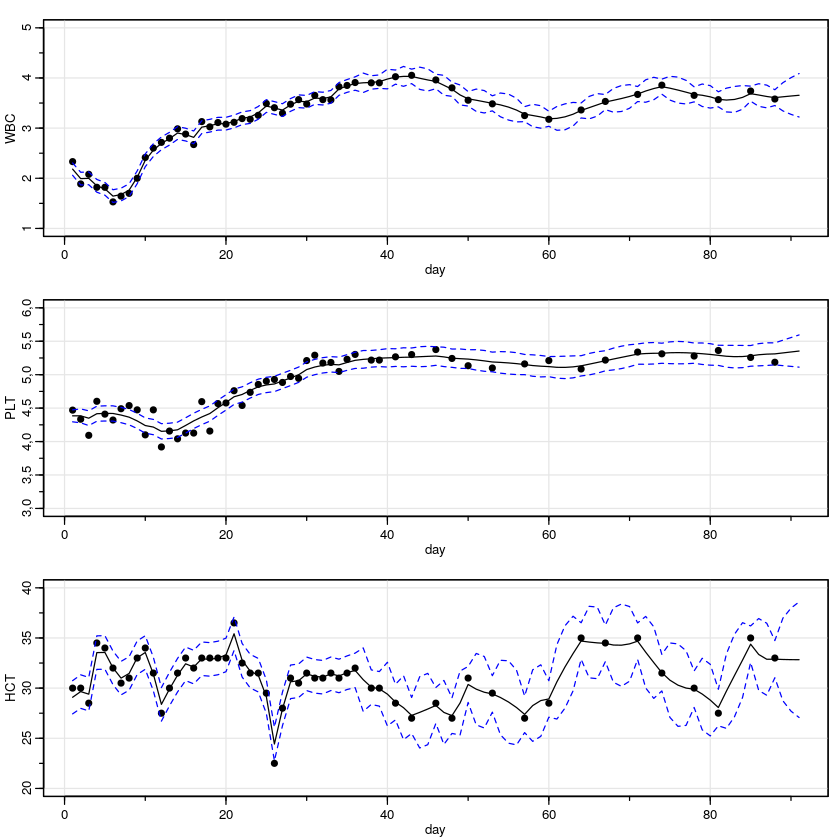

In [50]:
# Graph smoother
ks  = Ksmooth1(num, y, A, em$mu0, em$Sigma0, em$Phi, 0, 0, chol(em$Q), chol(em$R), 0)
y1s = ks$xs[1,,] 
y2s = ks$xs[2,,] 
y3s = ks$xs[3,,]
p1  = 2*sqrt(ks$Ps[1,1,]) 
p2  = 2*sqrt(ks$Ps[2,2,]) 
p3  = 2*sqrt(ks$Ps[3,3,])
par(mfrow=c(3,1))
tsplot(WBC, type='p', pch=19, ylim=c(1,5), xlab='day')
lines(y1s) 
lines(y1s+p1, lty=2, col=4) 
lines(y1s-p1, lty=2, col=4)
tsplot(PLT, type='p', ylim=c(3,6), pch=19, xlab='day')
lines(y2s)
lines(y2s+p2, lty=2, col=4)
lines(y2s-p2, lty=2, col=4)
tsplot(HCT, type='p', pch=19, ylim=c(20,40), xlab='day')
lines(y3s)
lines(y3s+p3, lty=2, col=4) 
lines(y3s-p3, lty=2, col=4)